# Beyond Throughput, The Next Generation: a 5G Dataset with Channel and Context Metrics

**Esse Notebook contém uma breve análise dos dados que o "Beyond Throughput, The Next Generation: a 5G Dataset with Channel and Context Metrics" repositorio do github dispoe. Os participantes são encorajados a experimentar com os dados para descobrir padrões, formas de resolver problemas no contexto da Hackathon. O dataset retira de um programa de streming para dispositivos Android que permite análises detalhadas da rede em tempo real. Com ele, é possível medir a intensidade do sinal, a qualidade da conexão, a latência e outras métricas importantes para avaliar o desempenho da rede. O aplicativo também oferece recursos avançados, como mapeamento de cobertura e análise de interferência de sinal.**

Imports

In [3]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import plotly.express as px

**Extração e união dos dados de cada uma das pastas retiradas a princípio dessa forma o dataset pode ser mais facilmente visualizado sendo posto em duas entradas de “Driving” e “Static” para os serviços já prestados pela mesma.**

Amazon

In [11]:
# Defina o caminho da pasta onde estão localizados os arquivos CSV
pasta = '5G-production-dataset/Amazon_Prime/Driving/Season3-TheExpanse/'

# Obtenha a lista de arquivos na pasta
arquivos_csv = [arquivo for arquivo in os.listdir(pasta) if arquivo.endswith('.csv')]

# Crie uma lista vazia para armazenar os dataframes
dataframes = []

# Percorra cada arquivo CSV na pasta
for arquivo in arquivos_csv:
    # Crie o caminho completo para o arquivo CSV
    caminho_arquivo = os.path.join(pasta, arquivo)
    
    # Abra o arquivo CSV e crie um dataframe com seus dados
    dataframe = pd.read_csv(caminho_arquivo)
    
    # Adicione o dataframe à lista de dataframes
    dataframes.append(dataframe)

# Concatene todos os dataframes em um único dataframe
df_final = pd.concat(dataframes)

# Exiba o dataframe final
df_final
df = df_final.reset_index(drop=True)
df = df.drop(['State','PINGAVG','PINGMIN','PINGMAX','PINGSTDEV','PINGLOSS','CELLHEX','NODEHEX','LACHEX','RAWCELLID','NRxRSRP','NRxRSRQ'], axis=1)
df.to_csv('Driving_theExpensive.csv')

Netflix

In [21]:
# Defina o caminho da pasta onde estão localizados os arquivos CSV
pasta = '5G-production-dataset/Netflix/Static/animated-RickandMorty/'

# Obtenha a lista de arquivos na pasta
arquivos_csv = [arquivo for arquivo in os.listdir(pasta) if arquivo.endswith('.csv')]

# Crie uma lista vazia para armazenar os dataframes
dataframes = []

# Percorra cada arquivo CSV na pasta
for arquivo in arquivos_csv:
    # Crie o caminho completo para o arquivo CSV
    caminho_arquivo = os.path.join(pasta, arquivo)
    
    # Abra o arquivo CSV e crie um dataframe com seus dados
    dataframe = pd.read_csv(caminho_arquivo)
    
    # Adicione o dataframe à lista de dataframes
    dataframes.append(dataframe)

# Concatene todos os dataframes em um único dataframe
df_final = pd.concat(dataframes)

# Exiba o dataframe final
df_final
df = df_final.reset_index(drop=True)
df = df.drop(['State','PINGAVG','PINGMIN','PINGMAX','PINGSTDEV','PINGLOSS','CELLHEX','NODEHEX','LACHEX','RAWCELLID','NRxRSRP','NRxRSRQ'], axis=1)
df.to_csv('Static_Rick.csv')


Dataset de dowloads

In [17]:
# Defina o caminho da pasta onde estão localizados os arquivos CSV
pasta = '5G-production-dataset/Download/Static/'

# Obtenha a lista de arquivos na pasta
arquivos_csv = [arquivo for arquivo in os.listdir(pasta) if arquivo.endswith('.csv')]

# Crie uma lista vazia para armazenar os dataframes
dataframes = []

# Percorra cada arquivo CSV na pasta
for arquivo in arquivos_csv:
    # Crie o caminho completo para o arquivo CSV
    caminho_arquivo = os.path.join(pasta, arquivo)
    
    # Abra o arquivo CSV e crie um dataframe com seus dados
    dataframe = pd.read_csv(caminho_arquivo)
    
    # Adicione o dataframe à lista de dataframes
    dataframes.append(dataframe)

# Concatene todos os dataframes em um único dataframe
df_final = pd.concat(dataframes)

# Exiba o dataframe final
df_final
df = df_final.reset_index(drop=True)
df = df.drop(['State','PINGAVG','PINGMIN','PINGMAX','PINGSTDEV','PINGLOSS','CELLHEX','NODEHEX','LACHEX','RAWCELLID','NRxRSRP','NRxRSRQ'], axis=1)
df.to_csv('Static_Dowload.csv')

JUNTANDO OS STATIC E DRIVING EM APENAS UM


In [28]:
# Defina o caminho da pasta onde estão localizados os arquivos CSV
pasta = 'Static/'

# Obtenha a lista de arquivos na pasta
arquivos_csv = [arquivo for arquivo in os.listdir(pasta) if arquivo.endswith('.csv')]

# Crie uma lista vazia para armazenar os dataframes
dataframes = []

# Percorra cada arquivo CSV na pasta
for arquivo in arquivos_csv:
    # Crie o caminho completo para o arquivo CSV
    caminho_arquivo = os.path.join(pasta, arquivo)
    
    # Abra o arquivo CSV e crie um dataframe com seus dados
    dataframe = pd.read_csv(caminho_arquivo)
    
    # Adicione o dataframe à lista de dataframes
    dataframes.append(dataframe)

# Concatene todos os dataframes em um único dataframe
df_final = pd.concat(dataframes)

# Exiba o dataframe final
df_final
df = df_final.reset_index(drop=True)
#df = df.drop(['State','PINGAVG','PINGMIN','PINGMAX','PINGSTDEV','PINGLOSS','CELLHEX','NODEHEX','LACHEX','RAWCELLID','NRxRSRP','NRxRSRQ'], axis=1)
df.to_csv('Static/Static.csv')


# **Agora explicando na pra pratica a da leitura e usos de analize do dataset**

In [5]:
l = pd.read_csv('Driving/Driving.csv')
l = l.drop(['Unnamed: 0.1','Unnamed: 0'], axis=1)
#l
l = l.drop(l[(l['NetworkMode'] == 'GPRS') | (l['NetworkMode'] == 'EDGE') | (l['NetworkMode'] == 'HSDPA') | (l['NetworkMode'] == 'HSPA+')| (l['NetworkMode'] == 'UMTS')| (l['NetworkMode'] == 'HSUPA')].index)
#l = ldrop(l[(l['NetworkMode'] == 'GPRS')].index)
l = l.reset_index(drop=True)
l

Timestamp  Longitude   Latitude  Speed Operatorname  CellID  \
0      2019.11.28_07.27.57  -8.388193  51.935608      0            B      12   
1      2019.11.28_07.27.57  -8.388269  51.935542      1            B      12   
2      2019.11.28_07.27.58  -8.388269  51.935542      1            B      12   
3      2019.11.28_07.27.59  -8.388269  51.935542      1            B      12   
4      2019.11.28_07.28.00  -8.388269  51.935542      1            B      12   
...                    ...        ...        ...    ...          ...     ...   
88942  2019.12.06_12.34.54  -8.395248  51.930942     22            B      13   
88943  2019.12.06_12.34.55  -8.395248  51.930942     22            B      13   
88944  2019.12.06_12.34.56  -8.395248  51.930942     22            B      13   
88945  2019.12.06_12.34.57  -8.395248  51.930942     22            B      13   
88946  2019.12.06_12.34.58  -8.395248  51.930942     22            B      13   

      NetworkMode  RSRP RSRQ  SNR CQI RSSI  DL_bitrate  UL_bitrate  
0              5G  -102  -10  8.0  14    -           0           0  
1              5G  -102  -10  8.0  14    -           0           0  
2              5G  -102  -10  8.0  14    -           0           2  
3              5G  -102  -10  3.0  14    -           3           2  
4              5G  -102  -10  3.0  14    -           9          13  
...           ...   ...  ...  ...  ..  ...         ...         ...  
88942          5G   -80  -11  3.0  11  -61           4          61  
88943          5G   -80  -11  4.0  11  -61           0           0  
88944          5G   -80  -11  4.0  14  -63           0           0  
88945          5G   -79  -11  5.0  14  -61           0           0  
88946          5G   -79  -11  5.0  14  -61           0           0  

[88947 rows x 14 columns]

Colunas
**Busque no manual do G-NetTrack por "Here is description of logfile columns" para encontrar o significado das colunas**

**Estão disponíveis as seguintes colunas (agrupadas logicamente):**

* Tempo:
 **Data_hora**

* Posicionamento:
 **Longitude, Latitude, Altitude, Height, Accuracy, Speed, Location**

* Qualidade do sinal:
**RSRP,	RSRQ,	SNR,	CQI, RSSI**

* Velocidade da conexão:
**DL_bitrate, UL_bitrate**

* Tipo de tecnologia
**NetworkMode**

# **Vamos visualizar por onde as coletas foram realizadas**

In [59]:
df = l[['Timestamp', 'Longitude', 'Latitude', 'Speed','NetworkMode']].dropna().reset_index()

fig = px.scatter_mapbox(df, lat='Latitude', lon='Longitude', color='NetworkMode',
                        size_max=20, zoom=11.8, width=1000, height=500,
                        center=dict(lon=(df.Longitude.min() + df.Longitude.max()) / 2, lat=(df.Latitude.min() + df.Latitude.max()) / 2))
fig.update_layout(
    mapbox=dict(
        style=
        #'carto-darkmatter'
        #'carto-positron'
        #'open-street-map'
        'stamen-toner'
        #'stamen-watercolor'
        #'white-bg'
        ,
    ),
    margin=dict(l=0, r=0, t=0, b=0),
)

In [60]:
fig = px.scatter_mapbox(df, lat='Latitude', lon='Longitude', color='Speed',
                        size_max=20, zoom=11.8, width=1000, height=500,
                        center=dict(lon=(df.Longitude.min() + df.Longitude.max()) / 2, lat=(df.Latitude.min() + df.Latitude.max()) / 2))
fig.update_layout(
    mapbox=dict(style='stamen-toner'),
    margin=dict(l=0, r=0, t=0, b=0),
)

**Fazemos alguns gráficos sobre a relação da tecnologia da rede e outros parâmetros (como bitrate de download e upload, e qualidade de sinal)**


Text(0.5, 1.0, 'Speed per NetworkTech')

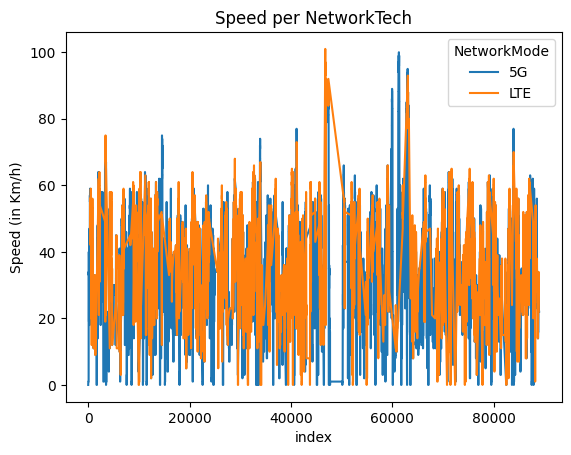

In [61]:
g = sns.lineplot(data=l.reset_index(), x='index', y='Speed', hue='NetworkMode')
g.set(ylabel='Speed (in Km/h)')
g.set_title('Speed per NetworkTech')

In [1]:
import matplotlib.ticker as tkr  

def sizeof_format(x, pos):
    if x < 0:
        return ''
    for x_unit in ['bytes', 'kB', 'MB', 'GB', 'TB']:
        if x < 1024.:
            return '%3.1f %s' % (x, x_unit)
        x /= 1024.

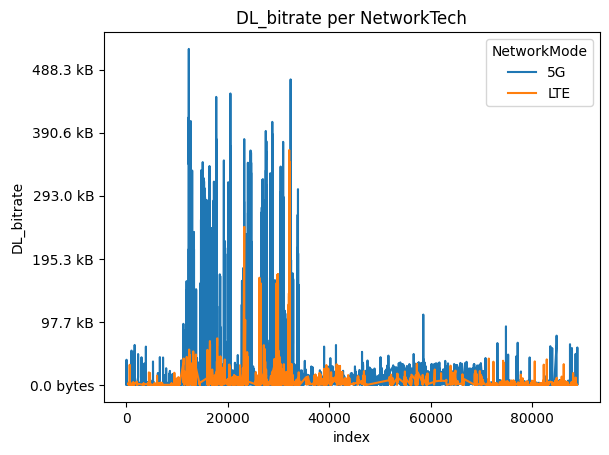

In [7]:
g = sns.lineplot(data=l[l.DL_bitrate > 60].reset_index(), x='index', y='DL_bitrate', hue='NetworkMode')
g.yaxis.set_major_formatter(tkr.FuncFormatter(sizeof_format))
g.set_title('DL_bitrate per NetworkMode');

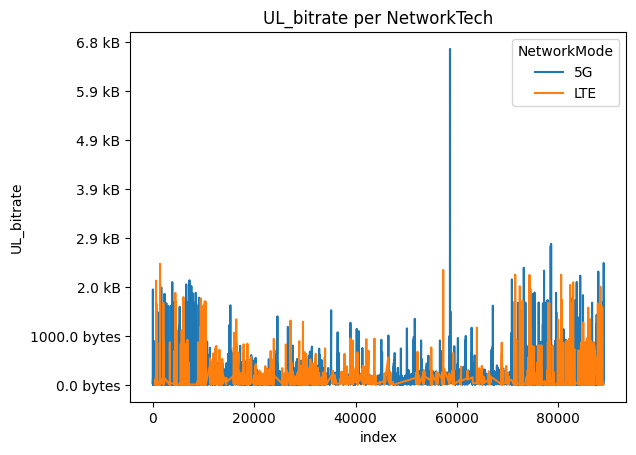

In [9]:
g = sns.lineplot(data=l[l.DL_bitrate > 60].reset_index(), x='index', y='UL_bitrate', hue='NetworkMode')
g.yaxis.set_major_formatter(tkr.FuncFormatter(sizeof_format))
g.set_title('UL_bitrate per NetworkMode');

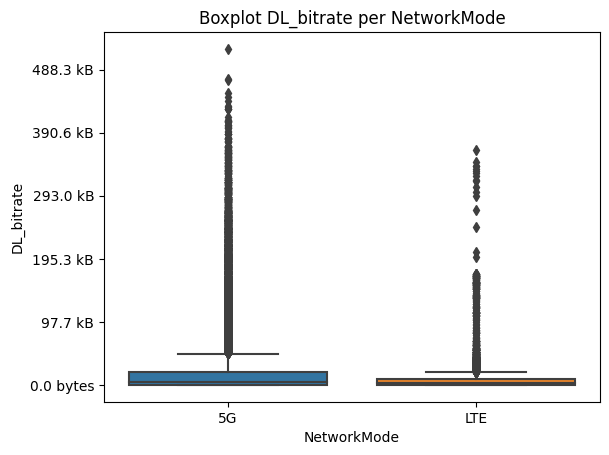

In [11]:
g = sns.boxplot(data=l[l.DL_bitrate > 60], x='NetworkMode', y='DL_bitrate')
g.yaxis.set_major_formatter(tkr.FuncFormatter(sizeof_format))
g.set_title('Boxplot DL_bitrate per NetworkMode');

In [13]:
l.groupby('NetworkMode')[['DL_bitrate', 'UL_bitrate']].describe()

DL_bitrate                                                       \
                 count          mean           std  min  25%    50%     75%   
NetworkMode                                                                   
5G             58255.0  11653.124865  40807.083767  0.0  0.0    2.0  2127.5   
LTE            30692.0   3864.565978  13557.220672  0.0  0.0  178.0  3322.0   

                      UL_bitrate                                              \
                  max      count       mean         std  min  25%  50%   75%   
NetworkMode                                                                    
5G           532905.0    58255.0  46.163282  128.710206  0.0  0.0  3.0  37.0   
LTE          372533.0    30692.0  55.757592  129.863424  0.0  0.0  9.0  70.0   

                     
                max  
NetworkMode          
5G           6862.0  
LTE          2474.0

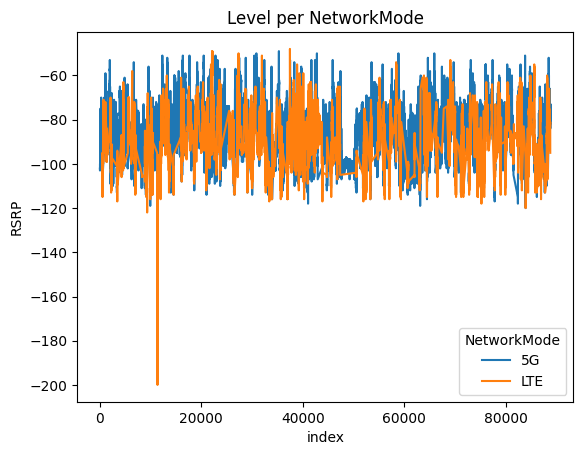

In [17]:
g = sns.lineplot(data=l.reset_index(), x='index', y='RSRP', hue='NetworkMode')
g.set_title('Level per NetworkMode');